In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
"""import ccxt
import datetime
import csv

# Initialize Binance API
exchange = ccxt.binance()

# Define the symbol and timeframe
symbol = 'BTC/USDT'
timeframe = '1h'

# Fetch the OHLCV data
ohlcv_data = exchange.fetch_ohlcv(symbol, timeframe)

# Save the data as a CSV file
with open('btc_hourly_data.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

    for data in ohlcv_data:
        timestamp = data[0]
        date = datetime.datetime.utcfromtimestamp(timestamp / 1000).strftime('%Y-%m-%d %H:%M:%S')
        open_price = data[1]
        high = data[2]
        low = data[3]
        close = data[4]
        volume = data[5]

        csv_writer.writerow([date, open_price, high, low, close, volume])

print("Hourly BTC data saved to 'btc_hourly_data.csv'")"""



'import ccxt\nimport datetime\nimport csv\n\n# Initialize Binance API\nexchange = ccxt.binance()\n\n# Define the symbol and timeframe\nsymbol = \'BTC/USDT\'\ntimeframe = \'1h\'\n\n# Fetch the OHLCV data\nohlcv_data = exchange.fetch_ohlcv(symbol, timeframe)\n\n# Save the data as a CSV file\nwith open(\'btc_hourly_data.csv\', \'w\', newline=\'\') as csvfile:\n    csv_writer = csv.writer(csvfile)\n    csv_writer.writerow([\'Date\', \'Open\', \'High\', \'Low\', \'Close\', \'Volume\'])\n\n    for data in ohlcv_data:\n        timestamp = data[0]\n        date = datetime.datetime.utcfromtimestamp(timestamp / 1000).strftime(\'%Y-%m-%d %H:%M:%S\')\n        open_price = data[1]\n        high = data[2]\n        low = data[3]\n        close = data[4]\n        volume = data[5]\n\n        csv_writer.writerow([date, open_price, high, low, close, volume])\n\nprint("Hourly BTC data saved to \'btc_hourly_data.csv\'")'

In [3]:
"""import requests
import pandas as pd
import datetime

symbol = 'BTCUSDT'
interval = '1h'
url = f'https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&limit=1000'

response = requests.get(url)
data = response.json()

btc_data = []
for item in data:
    timestamp, close_price, volume = item[:3]
    btc_data.append([timestamp, close_price, volume])

btc_df = pd.DataFrame(btc_data, columns=['timestamp', 'close', 'volume'])
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'], unit="ms")
btc_df.set_index('timestamp', inplace=True)

# Save the data to a CSV file
btc_df.to_csv('btc_hourly_prices.csv')
"""

'import requests\nimport pandas as pd\nimport datetime\n\nsymbol = \'BTCUSDT\'\ninterval = \'1h\'\nurl = f\'https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&limit=1000\'\n\nresponse = requests.get(url)\ndata = response.json()\n\nbtc_data = []\nfor item in data:\n    timestamp, close_price, volume = item[:3]\n    btc_data.append([timestamp, close_price, volume])\n\nbtc_df = pd.DataFrame(btc_data, columns=[\'timestamp\', \'close\', \'volume\'])\nbtc_df[\'timestamp\'] = pd.to_datetime(btc_df[\'timestamp\'], unit="ms")\nbtc_df.set_index(\'timestamp\', inplace=True)\n\n# Save the data to a CSV file\nbtc_df.to_csv(\'btc_hourly_prices.csv\')\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [5]:
# Read CSV file
data = pd.read_csv('btc_hourly_data.csv')

# Remove rows with NaN values
data = data.dropna()
data = data.sort_values(by='Date', ascending=True).reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])

# Select the relevant columns ('Close' price and 'Volume')
prices = data[['Close', 'Volume']].values

# Scale data
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices)

# Split data into train and test sets
train_size = int(len(prices) * 0.8)
train_data, test_data = prices[:train_size], prices[train_size:]


In [6]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Automatically set seq_length based on the length of the data
seq_length = len(data) // 60

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [7]:
# Create LSTM model with a larger network
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(1))


C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
"""model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(512))
model.add(Dense(512))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(1))"""


'model = Sequential()\nmodel.add(LSTM(512, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(512, return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(512, return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(512))\nmodel.add(Dense(512))\nmodel.add(Dense(256))\nmodel.add(Dense(128))\nmodel.add(Dense(1))'

In [9]:
"""model = Sequential()
model.add(LSTM(1024, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(1024, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(1024, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(1024, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(1024))
model.add(Dense(1024))
model.add(Dense(512))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(1))"""

'model = Sequential()\nmodel.add(LSTM(1024, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(1024, return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(1024, return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(1024, return_sequences=True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(1024))\nmodel.add(Dense(1024))\nmodel.add(Dense(512))\nmodel.add(Dense(256))\nmodel.add(Dense(128))\nmodel.add(Dense(1))'

In [10]:
# Compile and train model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=64, epochs=300)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.1977
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0542
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0304
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0230
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0144
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0102
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0072
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0063
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0057
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0048
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0046
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0048
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0054
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0052
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0047
Epoch 16/100
7/7 ━━

In [11]:
# Predict BTC prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.hstack((predicted_prices, X_test[:, -1, 1].reshape(-1, 1))))[:, 0]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


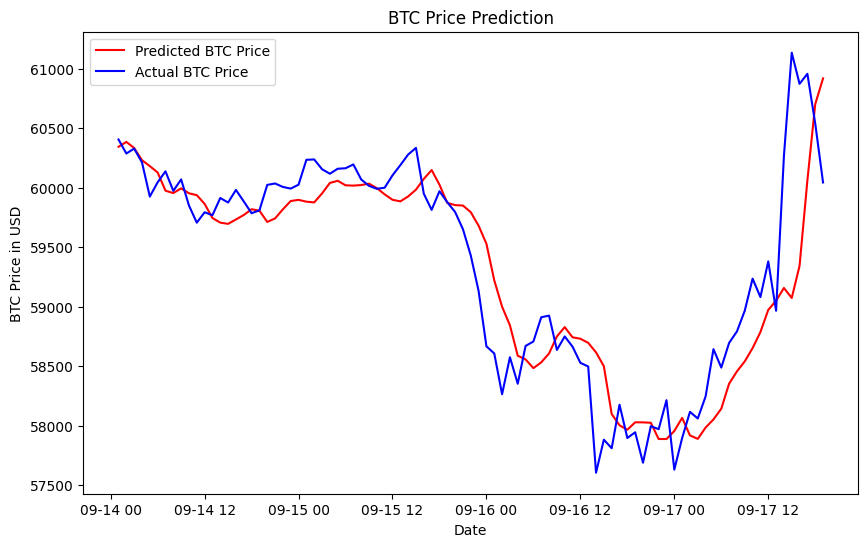

In [12]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][-len(predicted_prices):], predicted_prices, label='Predicted BTC Price', color='red')
plt.plot(data['Date'][-len(predicted_prices):], data['Close'][-len(predicted_prices):], label='Actual BTC Price', color='blue')
plt.xlabel('Date')
plt.ylabel('BTC Price in USD')
plt.title('BTC Price Prediction')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


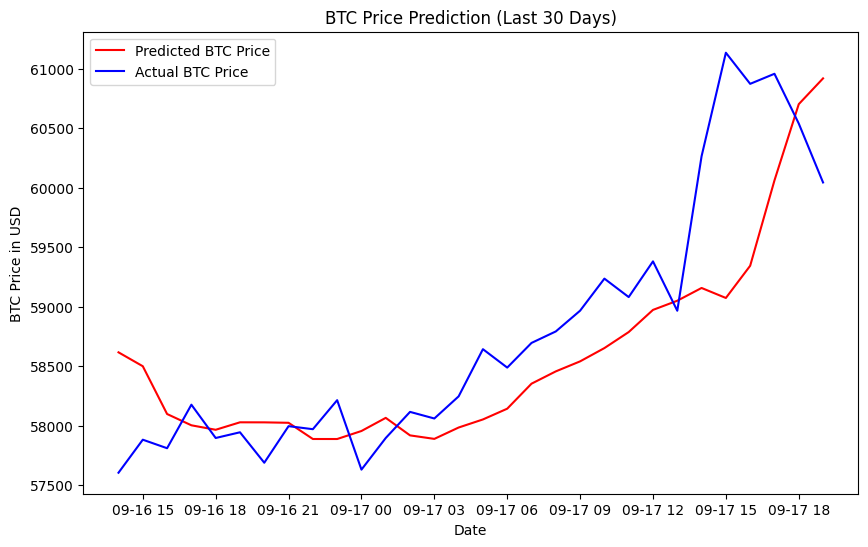

In [13]:
# Function to predict and plot prices for the specified number of days
def predict_and_plot(days_to_predict):
    X_last_days = X_test[-days_to_predict:]
    predicted_prices = model.predict(X_last_days)
    predicted_prices = scaler.inverse_transform(np.hstack((predicted_prices, X_test[-days_to_predict:, -1, 1].reshape(-1, 1))))[:, 0]

    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'][-days_to_predict:], predicted_prices, label='Predicted BTC Price', color='red')
    plt.plot(data['Date'][-days_to_predict:], data['Close'][-days_to_predict:], label='Actual BTC Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('BTC Price in USD')
    plt.title(f'BTC Price Prediction (Last {days_to_predict} Days)')
    plt.legend()
    plt.show()

# Input how many days you want to predict
days_to_predict = int(input("Enter the number of days you want to predict: "))

# Call the function to predict and plot prices for the specified number of days
predict_and_plot(days_to_predict)
